In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing the CSV data as pandas dataframe

In [2]:
#.\venv\Scripts\activate
df =pd.read_csv('Data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No null values

In [5]:
df.duplicated().sum()

0

No duplicates

Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number ofunique values of each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations:

the mean score of math, reading and writing are very close

The minimum for math is 0, while the minimum of reading is 17 and for writing is 10

The standard deviations are also very close

Exploring Data

In [9]:
print(" Categories in gender variable are ", df.gender.unique())
print(" Categories in race_ethnicity variable are ", df.race_ethnicity.unique())
print(" Categories in parental_level_of_education variable are ", df.parental_level_of_education.unique())
print(" Categories in lunch variable are ", df.lunch.unique())
print(" Categories in test_preparation _course variable are ", df.test_preparation_course.unique())

 Categories in gender variable are  ['female' 'male']
 Categories in race_ethnicity variable are  ['group B' 'group C' 'group A' 'group D' 'group E']
 Categories in parental_level_of_education variable are  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 Categories in lunch variable are  ['standard' 'free/reduced']
 Categories in test_preparation _course variable are  ['none' 'completed']


In [10]:
numeric_features =[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [11]:
print(numeric_features)


['math_score', 'reading_score', 'writing_score']


In [12]:
print(categorical_features)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding column for total score and average

In [13]:
df['total_score'] =df['math_score']+df['reading_score']+df['writing_score']
df['average'] =df['total_score']/3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:

reading_full =df[df['reading_score']==100]['average'].count()
math_full =df[df['math_score']==100]['average'].count()
writing_full =df[df['writing_score']==100]['average'].count()


In [16]:
reading_less_20 =df[df['reading_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
writing_less_20 =df[df['writing_score']<=20]['average'].count()

In [17]:
print(f'There are {reading_full} students who scored full in reading and {reading_less_20} who scored less than 20')
print(f'There are {writing_full} students who scored full in writing and {writing_less_20} who scored less than 20')
print(f'There are {math_full} students who scored full in math and {math_less_20} who scored less than 20')

There are 17 students who scored full in reading and 1 who scored less than 20
There are 14 students who scored full in writing and 3 who scored less than 20
There are 7 students who scored full in math and 4 who scored less than 20


From the above we can say students have performed the worst in math and best in reading

Exploring Data (Visualization)

Visualize  average score distribution to make some conclusion

1. Histogram
2. Kernel Distribution Function (KDE)

Histogram & KDE

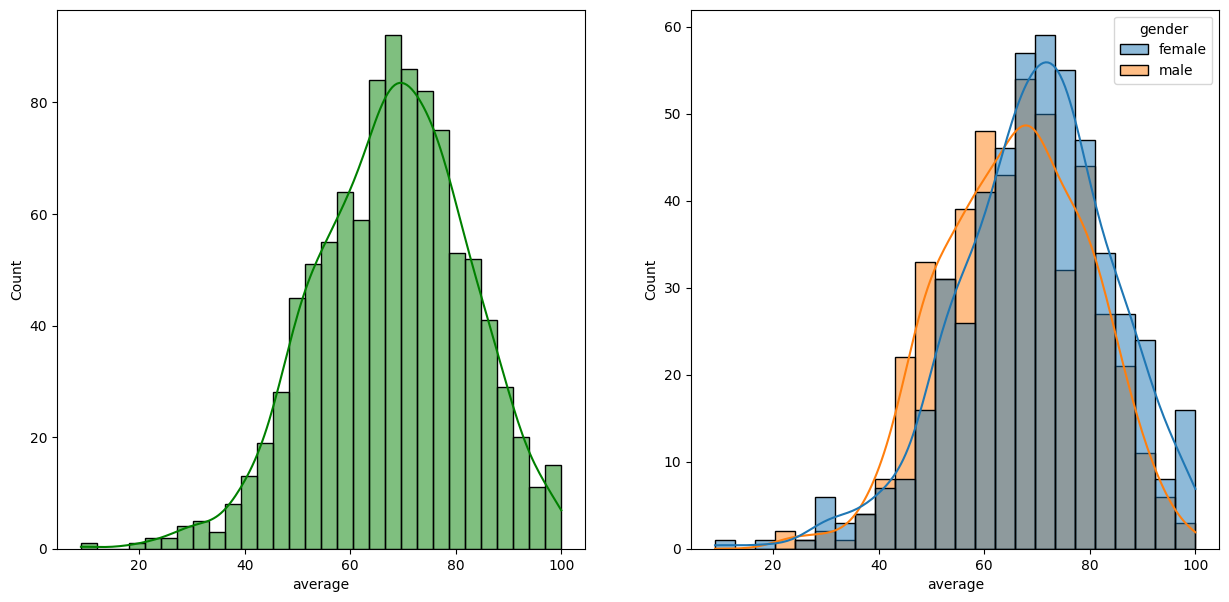

In [18]:
fig, axis =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data =df, x='average',bins =30,kde =True,color ='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde =True,hue ='gender')
plt.show()

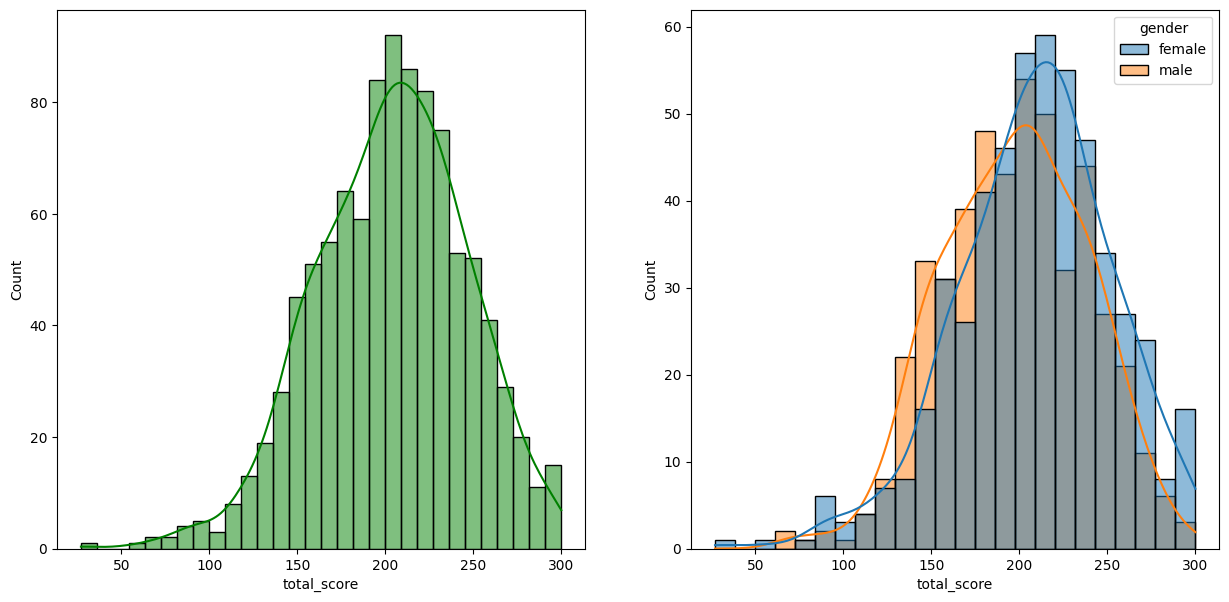

In [19]:
fig, axis =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data =df, x='total_score',bins =30,kde =True,color ='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde =True,hue ='gender')
plt.show()

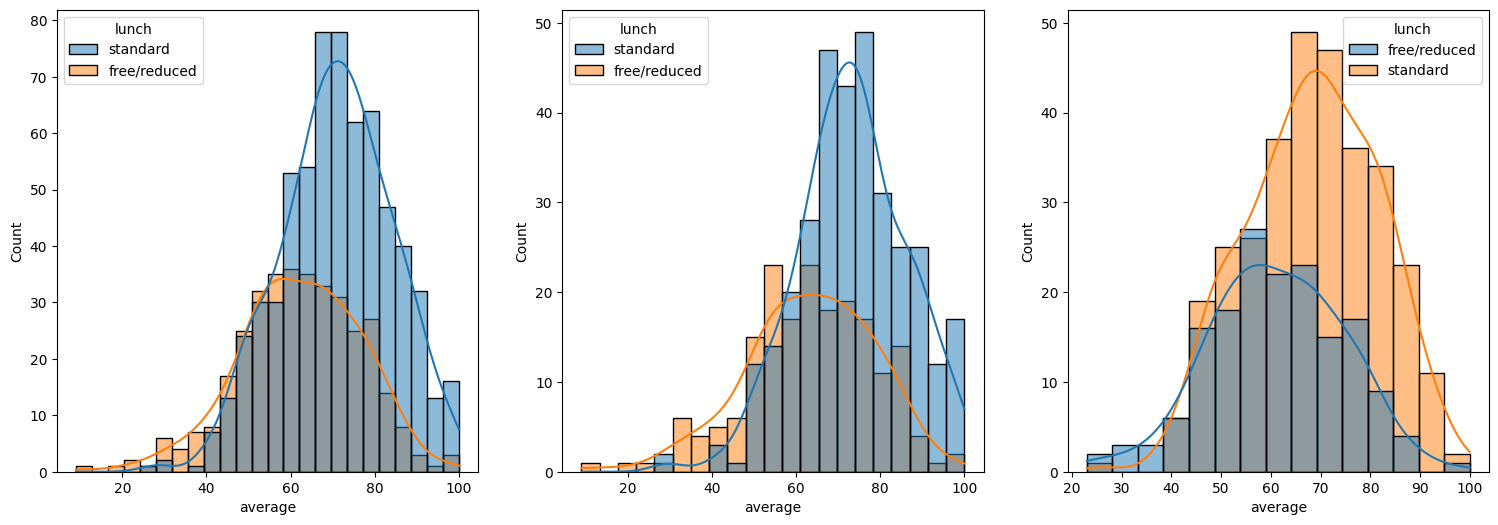

In [20]:
fig, axis =plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data =df, x='average',kde =True,hue ='lunch')
plt.subplot(142)
sns.histplot(data =df[df.gender=='female'], x='average',kde =True,hue ='lunch')
plt.subplot(143)
sns.histplot(data =df[df.gender=='male'], x='average',kde =True,hue ='lunch')
plt.show()

Insights

Standard lunch helps perform well in exams, for both the genders


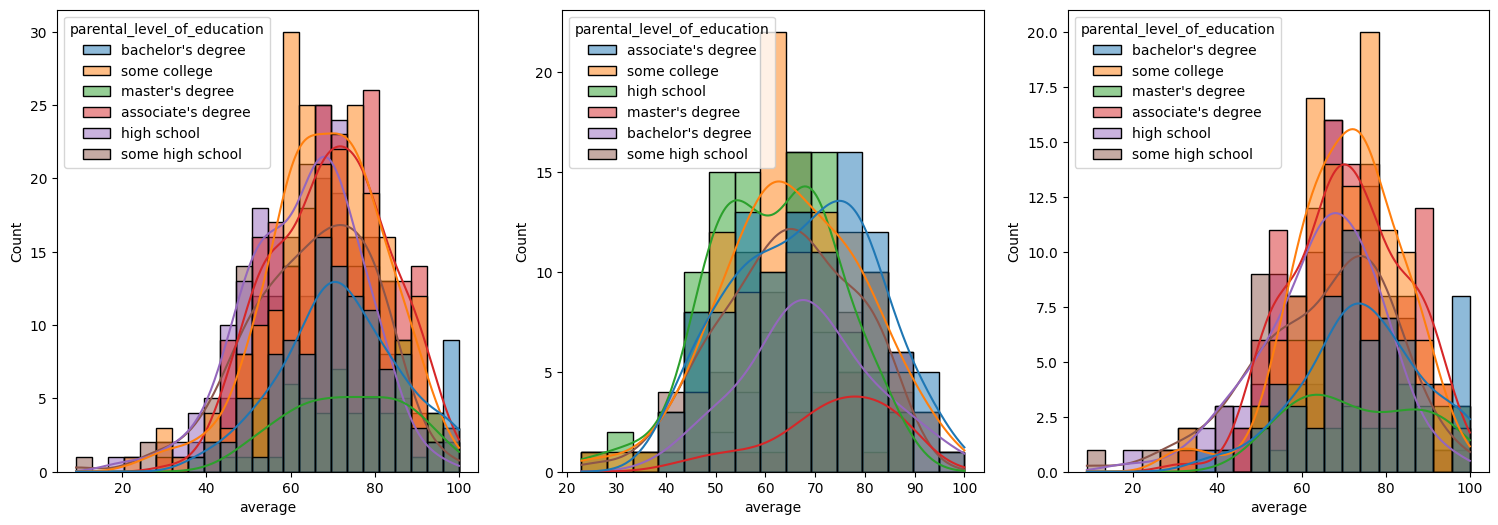

In [21]:
fig, axis =plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data =df, x='average',kde =True,hue ='parental_level_of_education')
plt.subplot(142)
sns.histplot(data =df[df.gender=='male'], x='average',kde =True,hue ='parental_level_of_education')
plt.subplot(143)
sns.histplot(data =df[df.gender=='female'], x='average',kde =True,hue ='parental_level_of_education')
plt.show()

Insights 

In general parent's education dont help student perform well in exam

2nd plot shows that sons of parents with an associate's degree or a master's degree
tend to perform well in exam

3rd plot shows that there is no effect of parental education on female students


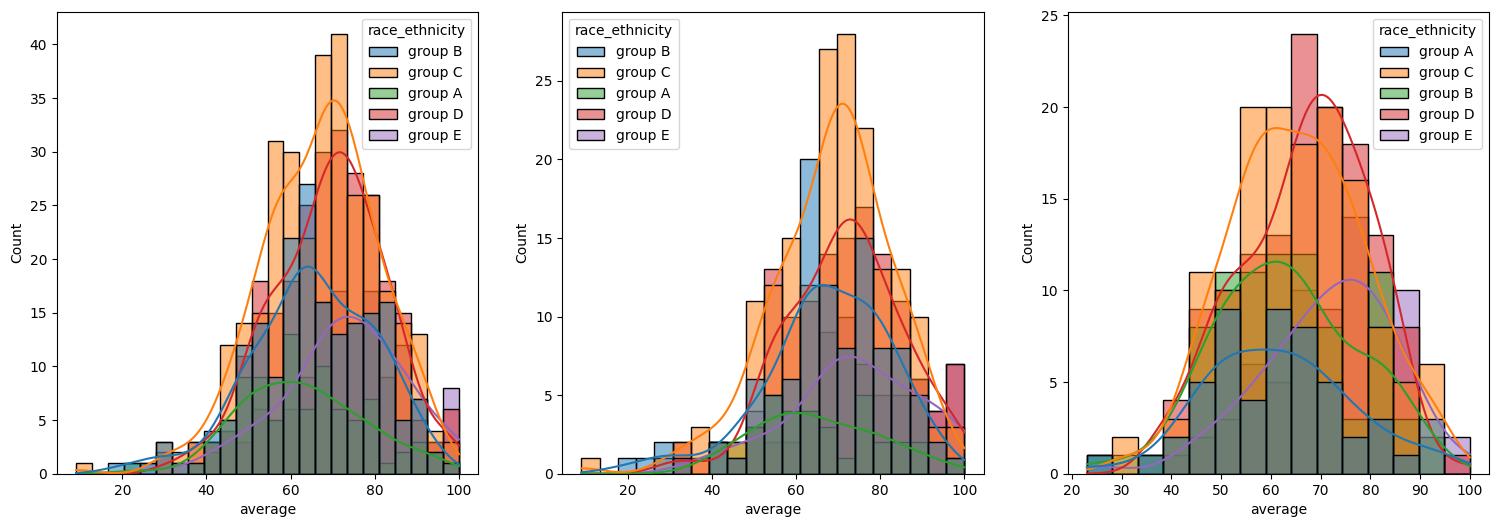

In [22]:
fig, axis =plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data =df, x='average',kde =True,hue ='race_ethnicity')
plt.subplot(142)
sns.histplot(data =df[df.gender=='female'], x='average',kde =True,hue ='race_ethnicity')
plt.subplot(143)
sns.histplot(data =df[df.gender=='male'], x='average',kde =True,hue ='race_ethnicity')
plt.show()

Insights

Group A and Group B tends to perform poorly in exam, regardless of gender

Maximum score of students in all three subjects

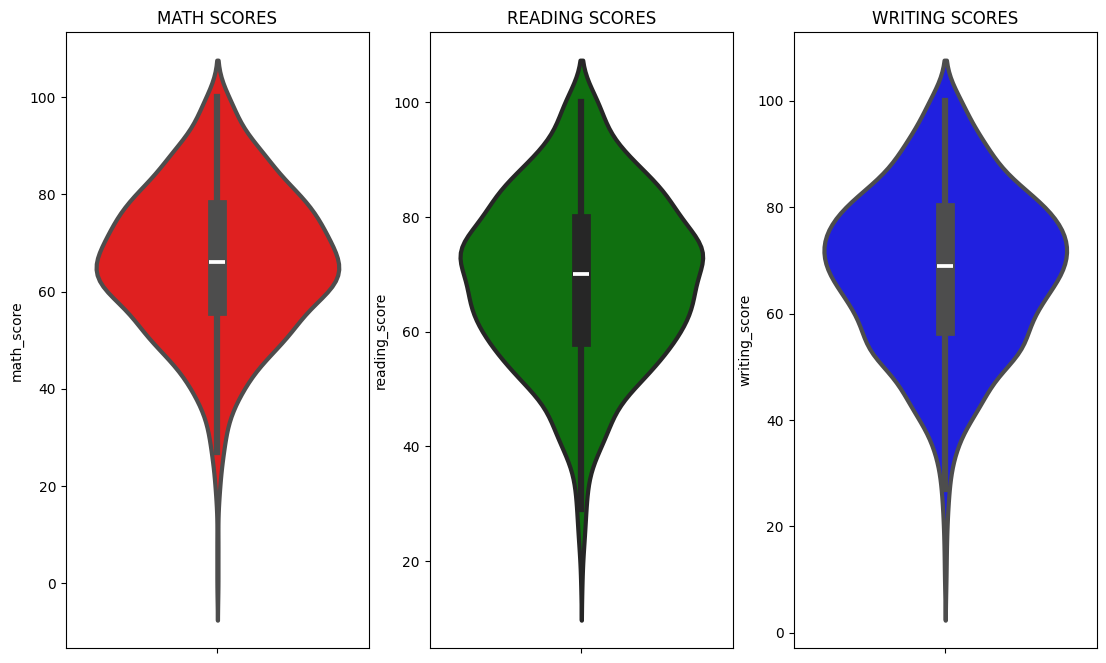

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data =df,color ='red',linewidth =3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data =df,color ='green',linewidth =3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data =df,color ='blue',linewidth =3)
plt.show()

Insights

From the above 3 plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

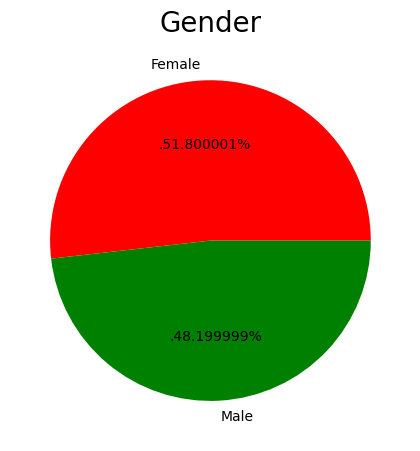

In [24]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size =df['gender'].value_counts()
labels ='Female','Male'
color =['red','green']

plt.pie(size,colors =color,labels =labels,autopct='.%2f%%')
plt.title('Gender',fontsize =20)
plt.axis('off')

Insights

Male and Female students are almost equal



(-1.25, 1.25, -1.25, 1.25)

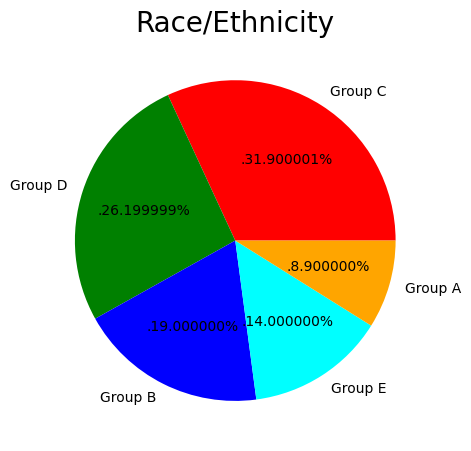

In [25]:
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')


Insights 

Group A has the lowest number of students and Group C has the highest number of students

(-1.25, 1.25, -1.25, 1.25)

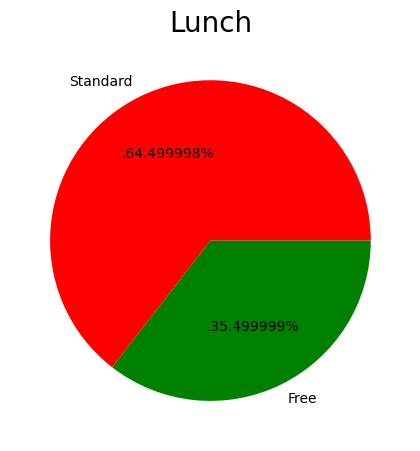

In [26]:
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


Insights 

Students who have standard lunch are much higher than those that have free lunch


(-1.25, 1.25, -1.25, 1.25)

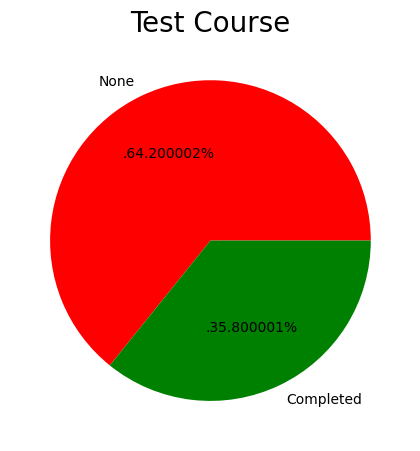

In [27]:
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


Insights

Students who haven't enrolled for any test course is much higher than those have enrolled for a test course


(-1.25, 1.25, -1.25, 1.25)

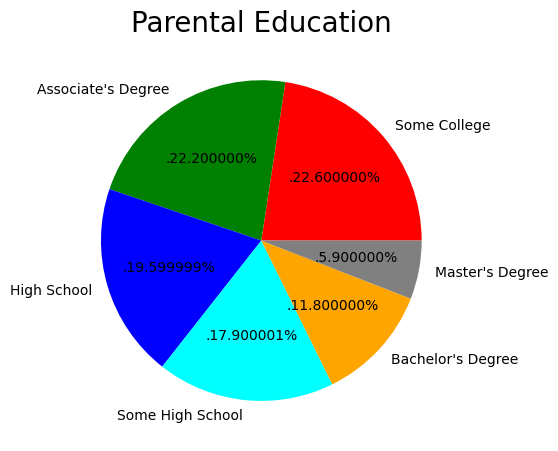

In [28]:

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


Insights

Students whose parental education is  from 'some college' is greater followed closely by associate's degree

Feature Wise Visualization

Gender Column







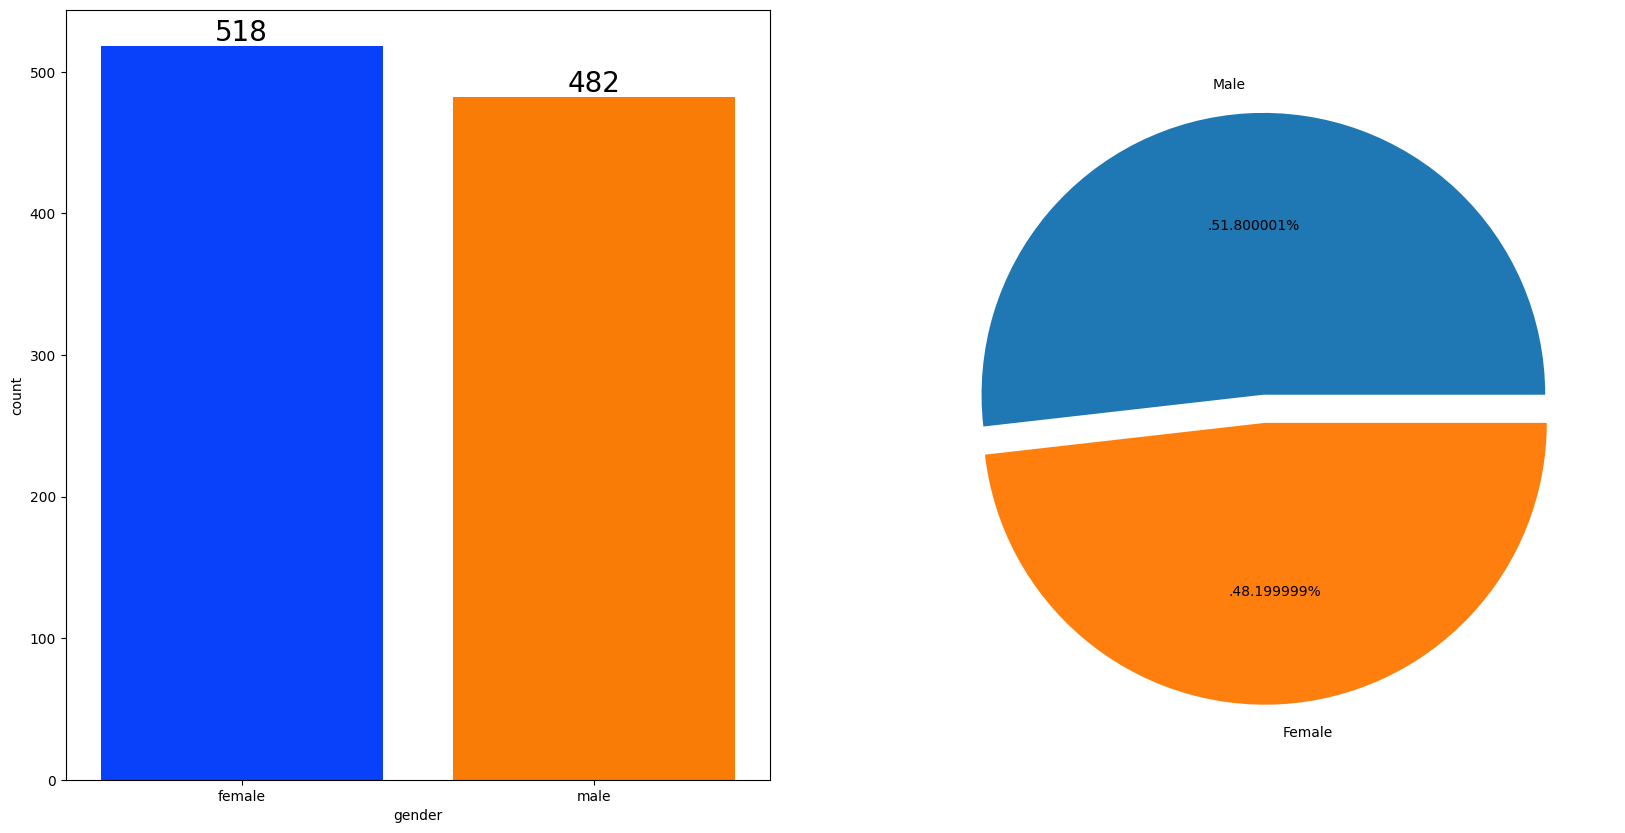

In [29]:
f, ax =plt.subplots(1,2,figsize =(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation =0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color ='black',size =20)
plt.pie(x=df['gender'].value_counts(),labels =['Male','Female'],explode =[0,0.1],autopct = '.%2f%%')
plt.show()

Insights

Gender has balanced data with female students comprising of 518 (52%) and male students 482 (48%)

Bivariate Analysis - (Does Gender have any impact on student's performance?)

In [39]:
gender_group =df.groupby('gender').count()


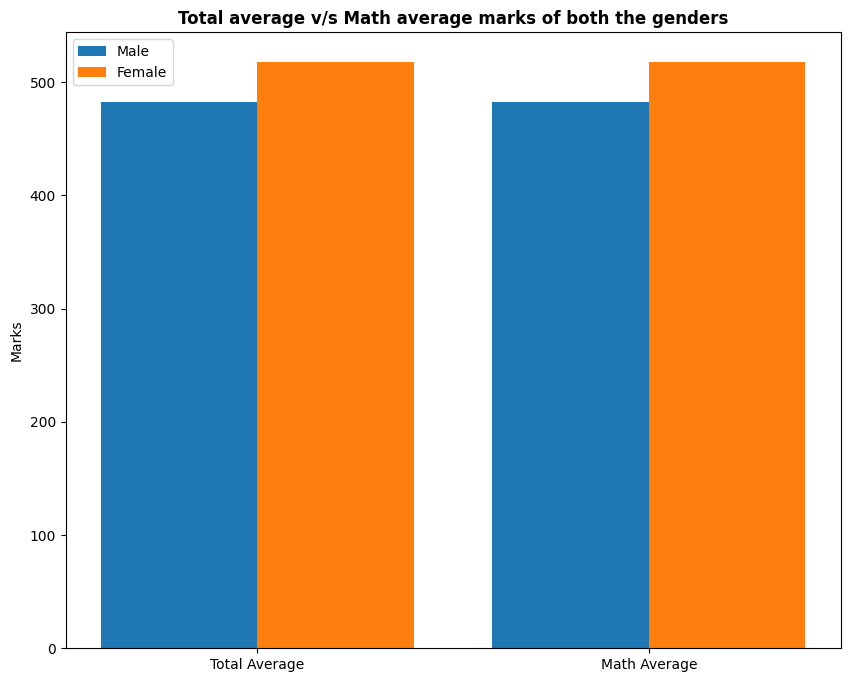

In [40]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

On an average females have a better overall score tha men
whereas males have scored higher in maths

RACE / ETHNICITY 

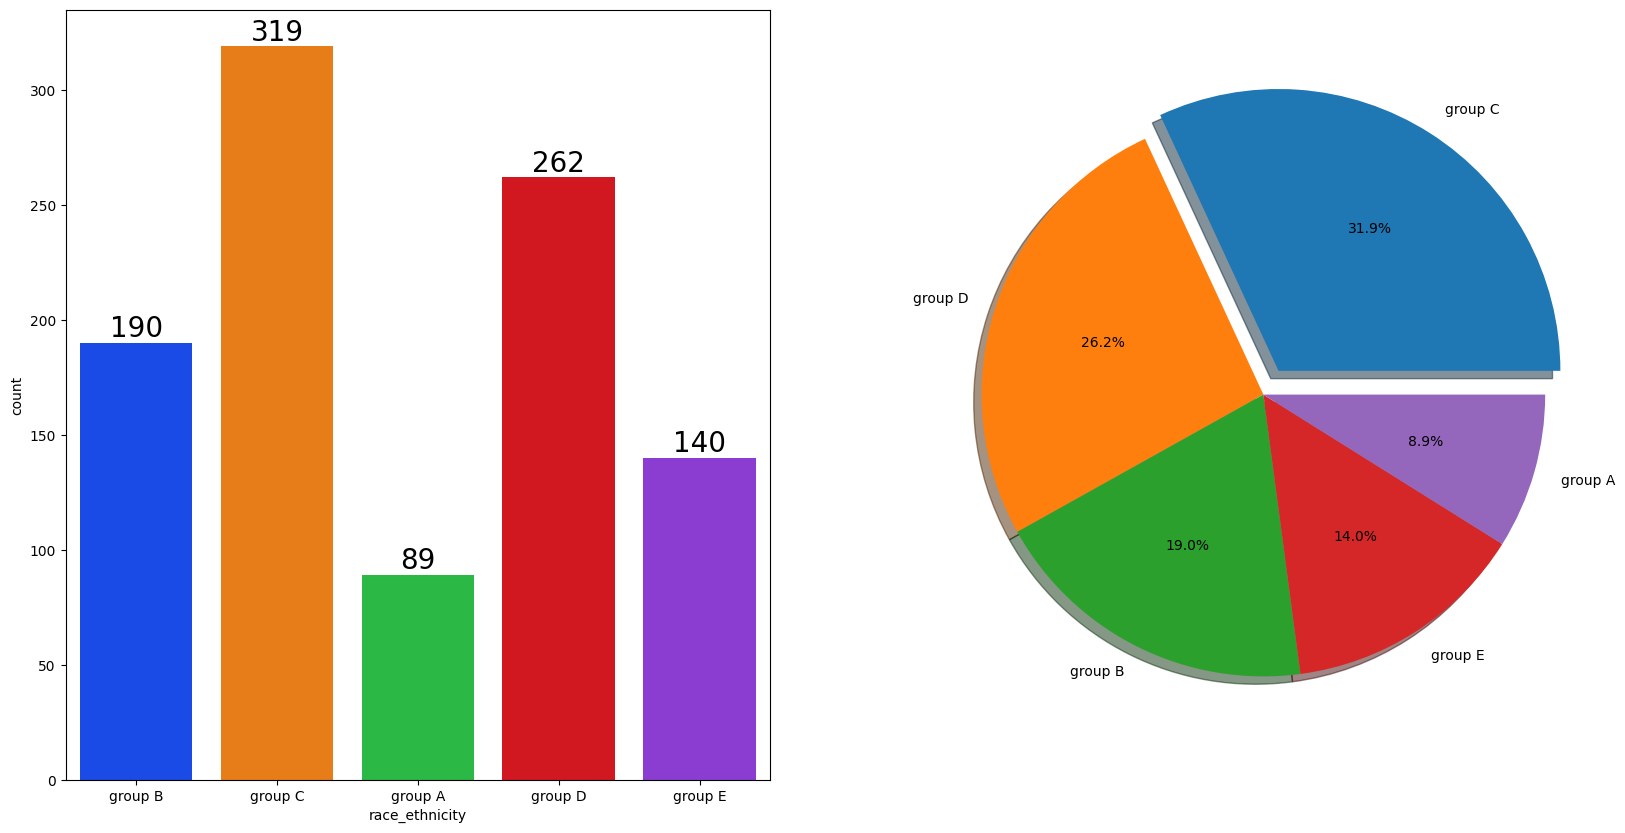

In [36]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.80)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights

Most of the students belong to either group C and D
Lowest number of students belong to group A


BIVARIATE ANALYSIS (Does Race/Ethnicity has any impact on student's performance?)

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax = plt.

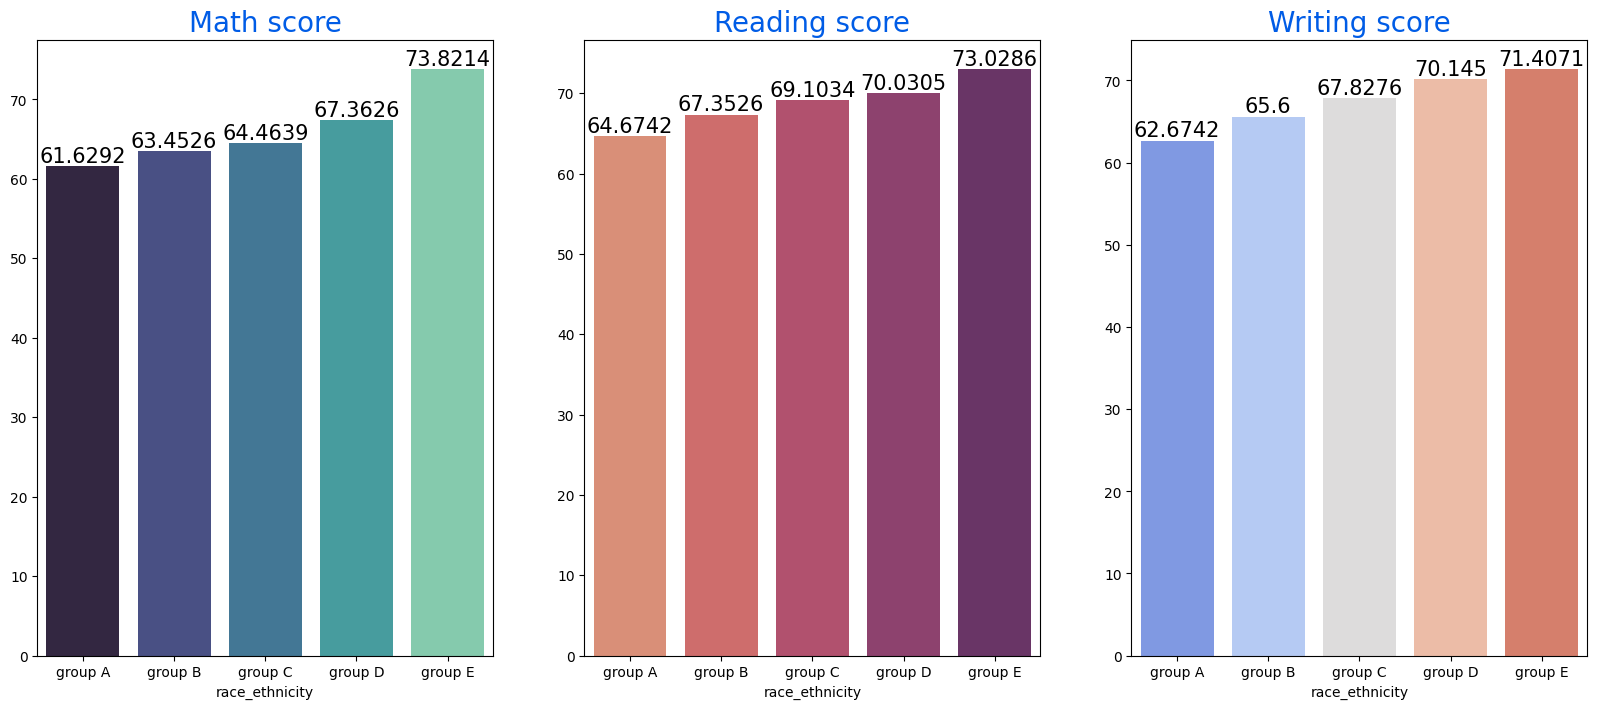

In [41]:

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights 

Group E students have scored the highest marks and Group A scored the lowest marks.
The average marks of Group B and Group C are the same.


Students from a lower socialeconomic status have a lower average in all subjects

UNIVARIATE ANALYSIS (What is the educational background of the student's parent?)

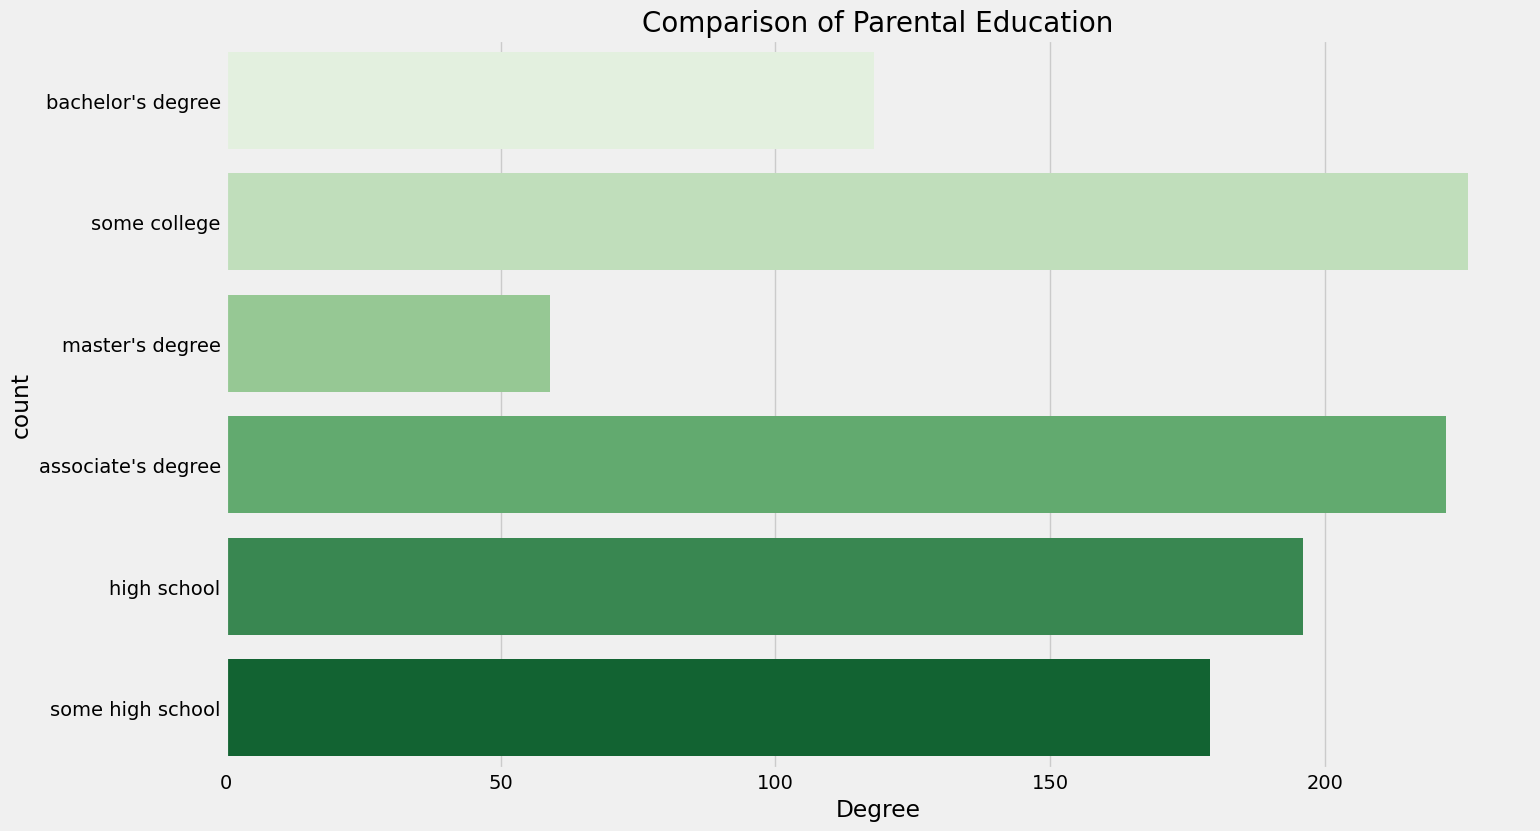

In [49]:

plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette ='Greens')
plt.title('Comparison of Parental Education',fontweight = 30,fontsize =20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights

Largest number of parents studied in some college

BIVARIATE ANALYSIS(Does parental education have any impact on the student's performance?)

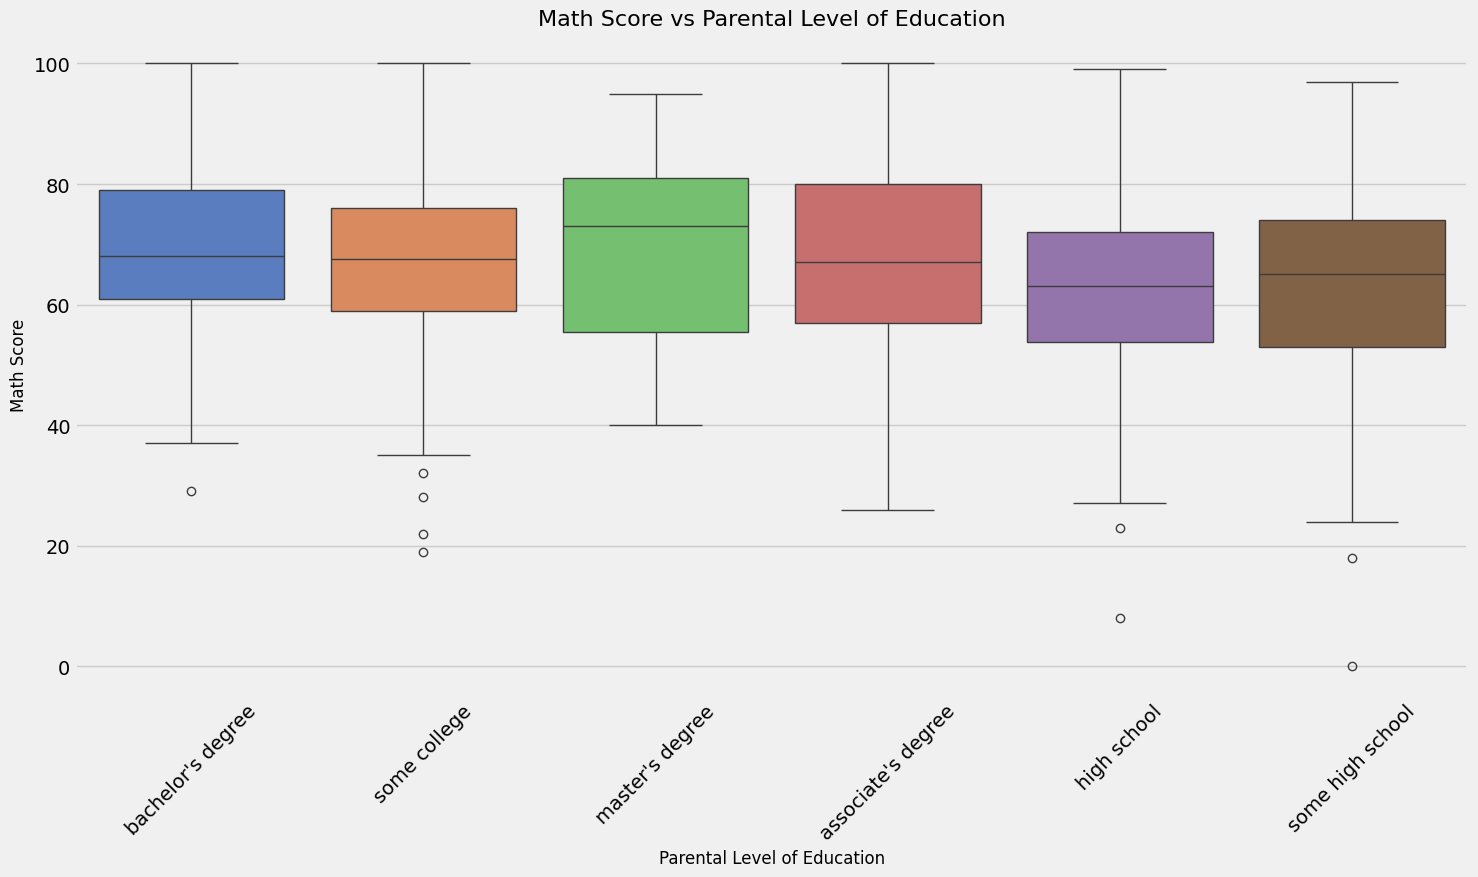

In [66]:

sns.boxplot(x='parental_level_of_education', y='math_score', data=df, palette='muted')

plt.title('Math Score vs Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=12)
plt.ylabel('Math Score', fontsize=12)

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

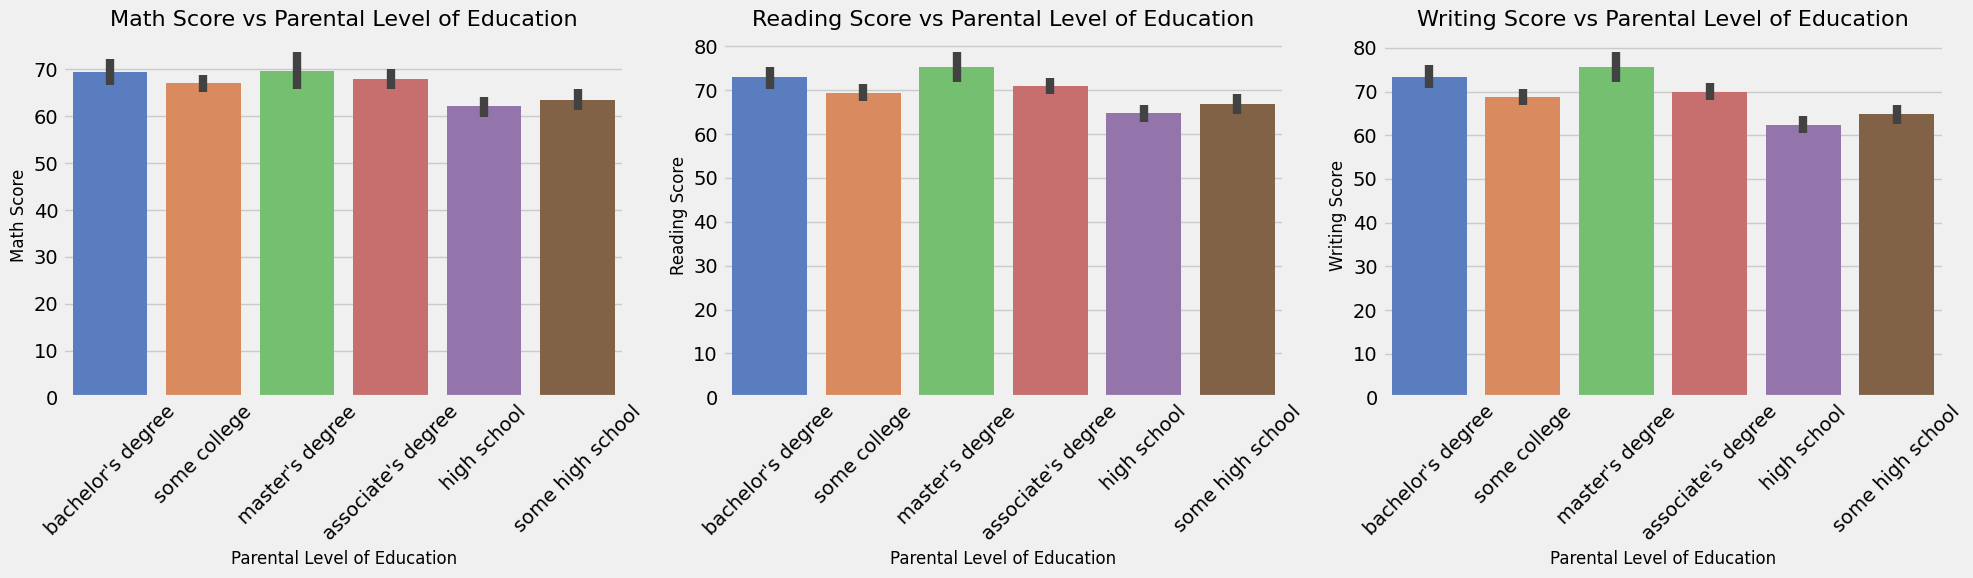

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='parental_level_of_education', y='math_score', data=df, palette='muted', ax=ax[0])
ax[0].set_title('Math Score vs Parental Level of Education', fontsize=16)
ax[0].set_xlabel('Parental Level of Education', fontsize=12)
ax[0].set_ylabel('Math Score', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='parental_level_of_education', y='reading_score', data=df, palette='muted', ax=ax[1])
ax[1].set_title('Reading Score vs Parental Level of Education', fontsize=16)
ax[1].set_xlabel('Parental Level of Education', fontsize=12)
ax[1].set_ylabel('Reading Score', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(x='parental_level_of_education', y='writing_score', data=df, palette='muted', ax=ax[2])
ax[2].set_title('Writing Score vs Parental Level of Education', fontsize=16)
ax[2].set_xlabel('Parental Level of Education', fontsize=12)
ax[2].set_ylabel('Writing Score', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)

# Tight layout to adjust the spacing between subplots
plt.tight_layout()
plt.show()


The score of student whose parents possess master and bachelor level education are higher than others.

LUNCH COLUMN

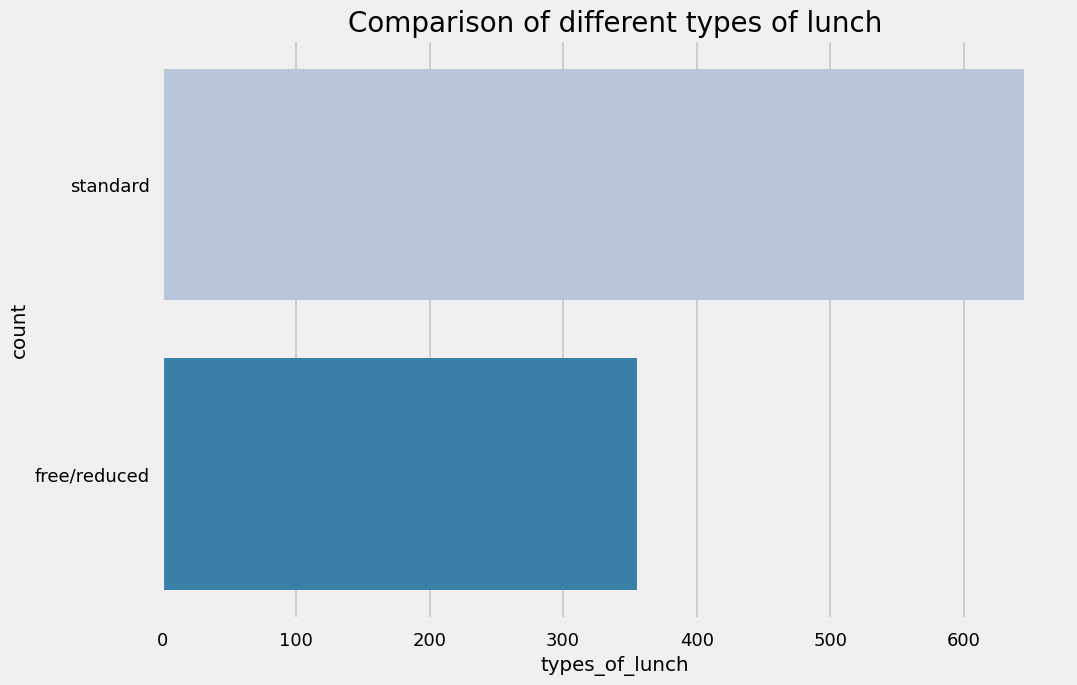

In [69]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types_of_lunch')
plt.ylabel('count')
plt.show()

Insights

Students who were served standard lunch were significantly more tha free lunch

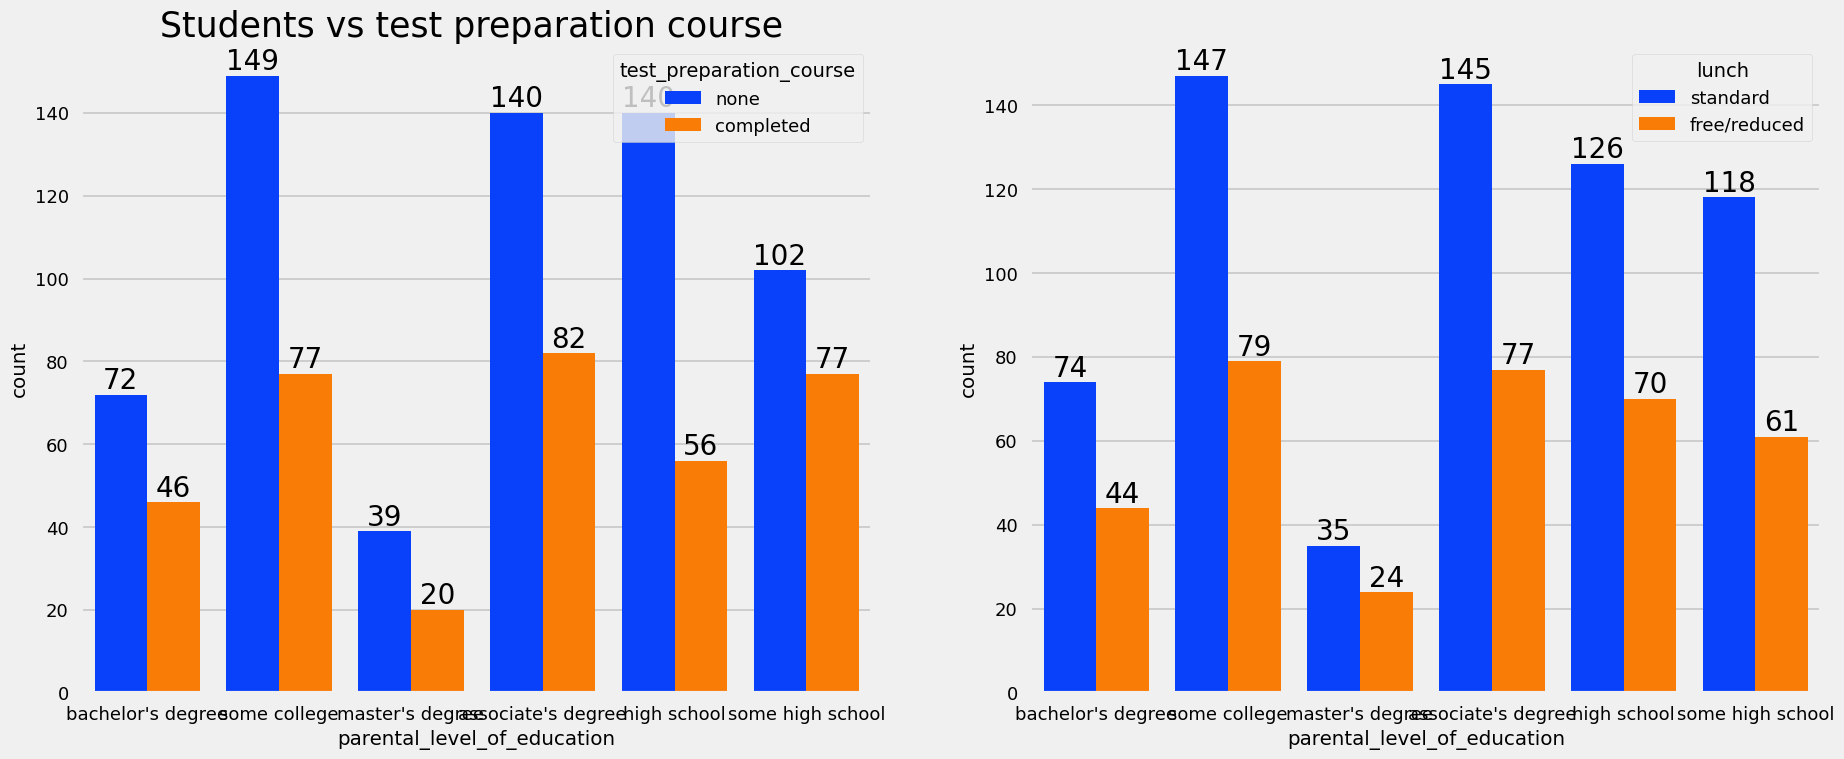

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

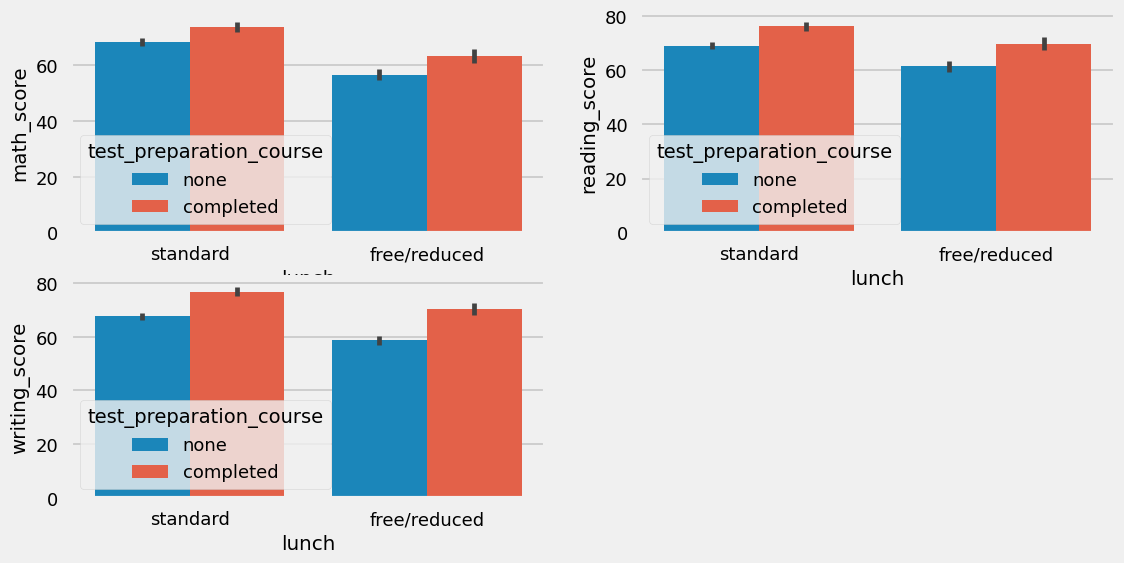

In [75]:

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights

Those who completed the courses performed better in all 3 categories than those who dint

Checing outliers

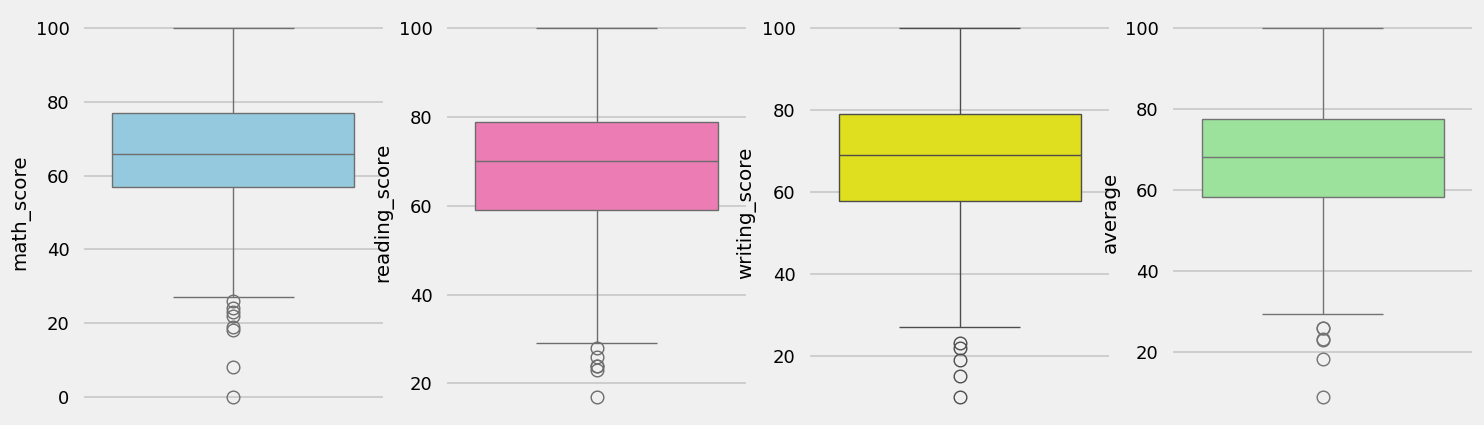

In [76]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()